In [20]:
# Loading needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [21]:
###Read the dataset
U4_New_Combine_Data = pd.read_csv('U4NewCombinedFeatureswithInterFactors1.csv')
U4_New_Combine_Data

FirstLayer_task_speed_factor_1  FirstLayer_task_speed_factor_2  \
0                         -3.041183                       -2.161556   
1                          5.613943                        1.909182   
2                          7.891109                        0.446601   
3                         -0.357027                        0.273125   
4                          4.798181                        0.097582   
..                              ...                             ...   
176                       -2.088060                       -1.868695   
177                        6.401241                       -1.330590   
178                        5.341267                        0.150351   
179                       -3.621819                       -1.504888   
180                        5.310356                        0.000795   

     FirstLayer_task_speed_factor_3  FirstLayer_task_speed_factor_4  \
0                         -0.018865                       -0.276231   
1                          0.090802                       -0.116591   
2                          0.510158                       -0.842553   
3                          0.349702                       -0.953873   
4                         -0.793750                       -0.688611   
..                              ...                             ...   
176                        1.815072                       -0.041571   
177                       -0.186544                       -0.087905   
178                        0.433131                       -0.079543   
179                       -0.437956                       -0.158763   
180                       -0.140594                       -1.063800   

     FirstLayer_task_speed_factor_5  FirstLayer_task_speed_factor_6  \
0                          1.247868                       -0.972796   
1                          0.016738                       -0.520311   
2                          0.977582                       -0.281551   
3                          0.819965                        0.345412   
4                          0.705509                       -0.826838   
..                              ...                             ...   
176                        0.634143                        1.026965   
177                       -0.236588                       -1.344157   
178                        0.180380                        0.475698   
179                        1.784658                        0.838264   
180                       -0.466880                        0.800535   

     FirstLayer_task_share_factor_1  FirstLayer_task_share_factor_2  \
0                         -0.076341                        0.477304   
1                         -0.321464                        1.051820   
2                          0.354216                        1.559583   
3                         -0.387053                       -1.595584   
4                         -0.672314                        0.352738   
..                              ...                             ...   
176                        0.170598                       -0.016134   
177                        0.509271                        0.005104   
178                       -0.515296                        0.161298   
179                        1.045522                        0.493476   
180                       -0.213032                       -0.639813   

     FirstLayer_task_share_factor_3       playerName  ...  \
0                         -0.507578              A M  ...   
1                          0.097367  Abigail Bellamy  ...   
2                         -0.015471      Addison Fox  ...   
3                         -0.280605    Ahmad Borders  ...   
4                         -0.730946    Aidan Johnson  ...   
..                              ...              ...  ...   
176                        0.289798    Wyatt Logsdon  ...   
177                        0.978485  Xavier Fountain  ...   
178                       -0.423586  Xzaviar

In [22]:
# Machine learning systems work with integers, we need to encode these
# string characters into ints

encoder = LabelEncoder()

# Now apply the transformation to all the columns:
for col in U4_New_Combine_Data.columns:
    U4_New_Combine_Data[col] = encoder.fit_transform(U4_New_Combine_Data[col])

y_label = U4_New_Combine_Data['POSTU4']
X_features = U4_New_Combine_Data.drop(['playerName','POSTU4'],axis=1)

In [23]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=42, stratify=y_label)

In [24]:
# Define classifiers
classifiers = {
    "SVC": SVC(probability=True, kernel='linear', random_state=42),
    "RF": RandomForestClassifier(random_state=42),
    "LR": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(),
    "GNB": GaussianNB(),
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "GBC": GradientBoostingClassifier(random_state=42),
    "ABC": AdaBoostClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

In [25]:
# Train classifiers and collect importances
feature_importances = np.zeros((len(classifiers), X_train.shape[1]))

for i, (name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train, y_train)
    if hasattr(clf, 'feature_importances_'):
        feature_importances[i] = clf.feature_importances_
    else:
        # Calculate permutation importance as fallback
        r = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
        feature_importances[i] = r.importances_mean

C:\Users\wldh6\anaconda3\envs\paper-3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wldh6\anaconda3\envs\paper-3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:05:53] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\wldh6\anaconda3\envs\paper-3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use th

In [26]:
# Normalize the importance rates
normalized_importances = np.zeros_like(feature_importances)

for i in range(feature_importances.shape[0]):
    
    if np.sum(feature_importances[i]) != 0:
        normalized_importances[i] = feature_importances[i] / np.sum(feature_importances[i])
    else:
        normalized_importances[i] = feature_importances[i]

# Calculate the average of normalized importances
average_normalized_importance = np.median(normalized_importances, axis=0)
print("Normalized Average Feature Importance:", average_normalized_importance)   

Normalized Average Feature Importance: [9.36246056e-03 4.11828522e-03 7.36115829e-03 3.76172805e-03
 9.46381902e-03 1.03845458e-03 5.98325039e-03 1.40977444e-03
 2.04878946e-03 2.92753608e-03 8.06654375e-03 5.04130635e-03
 5.78120150e-04 3.47647763e-03 6.97742008e-03 7.32602097e-04
 3.00213112e-03 2.72357531e-03 1.59741475e-07 5.46559008e-03
 1.84760362e-03 2.37624995e-03 5.24948197e-06 2.68605176e-03
 2.08424522e-03 3.91319962e-03 5.30427532e-04 1.17408389e-02
 1.78959632e-03 5.40039121e-04 3.57705240e-03 2.69648352e-03
 6.73320250e-03 2.09000081e-03 9.39849624e-04 9.19651036e-03
 5.29937503e-03 1.99113905e-03 3.09896363e-03 1.14611051e-02
 3.76172805e-03 9.72987489e-03 1.16698527e-02 5.86037644e-07
 1.64473684e-03 9.64526277e-03 7.15136016e-03 1.20479465e-02
 7.64084531e-03 3.64051505e-03 3.23709353e-03 1.31309564e-02
 4.84870273e-03 4.96269753e-03 0.00000000e+00 4.28885719e-03
 1.08989576e-03 5.96296484e-03 3.26085665e-03 1.00637259e-05
 1.22302193e-03 5.57264404e-03 1.19022802e-03 

In [27]:
nom_feat_importance = pd.Series(average_normalized_importance, index = X_features.columns) 
nom_feat_importance

FirstLayer_task_speed_factor_1    0.009362
FirstLayer_task_speed_factor_2    0.004118
FirstLayer_task_speed_factor_3    0.007361
FirstLayer_task_speed_factor_4    0.003762
FirstLayer_task_speed_factor_5    0.009464
                                    ...   
ThirdLayer_inter_factor_11        0.004301
ThirdLayer_inter_factor_12        0.006166
ThirdLayer_inter_factor_13        0.005881
ThirdLayer_inter_factor_14        0.004896
ThirdLayer_inter_factor_15        0.001046
Length: 177, dtype: float64

In [28]:
# Define the default color and the highlight color
default_color = 'blue'
highlight_color = 'orange'

# Create a list of colors
colors = [highlight_color if feature in ["floodArmoryScore"] else default_color for feature in nom_feat_importance.nlargest(24).index]

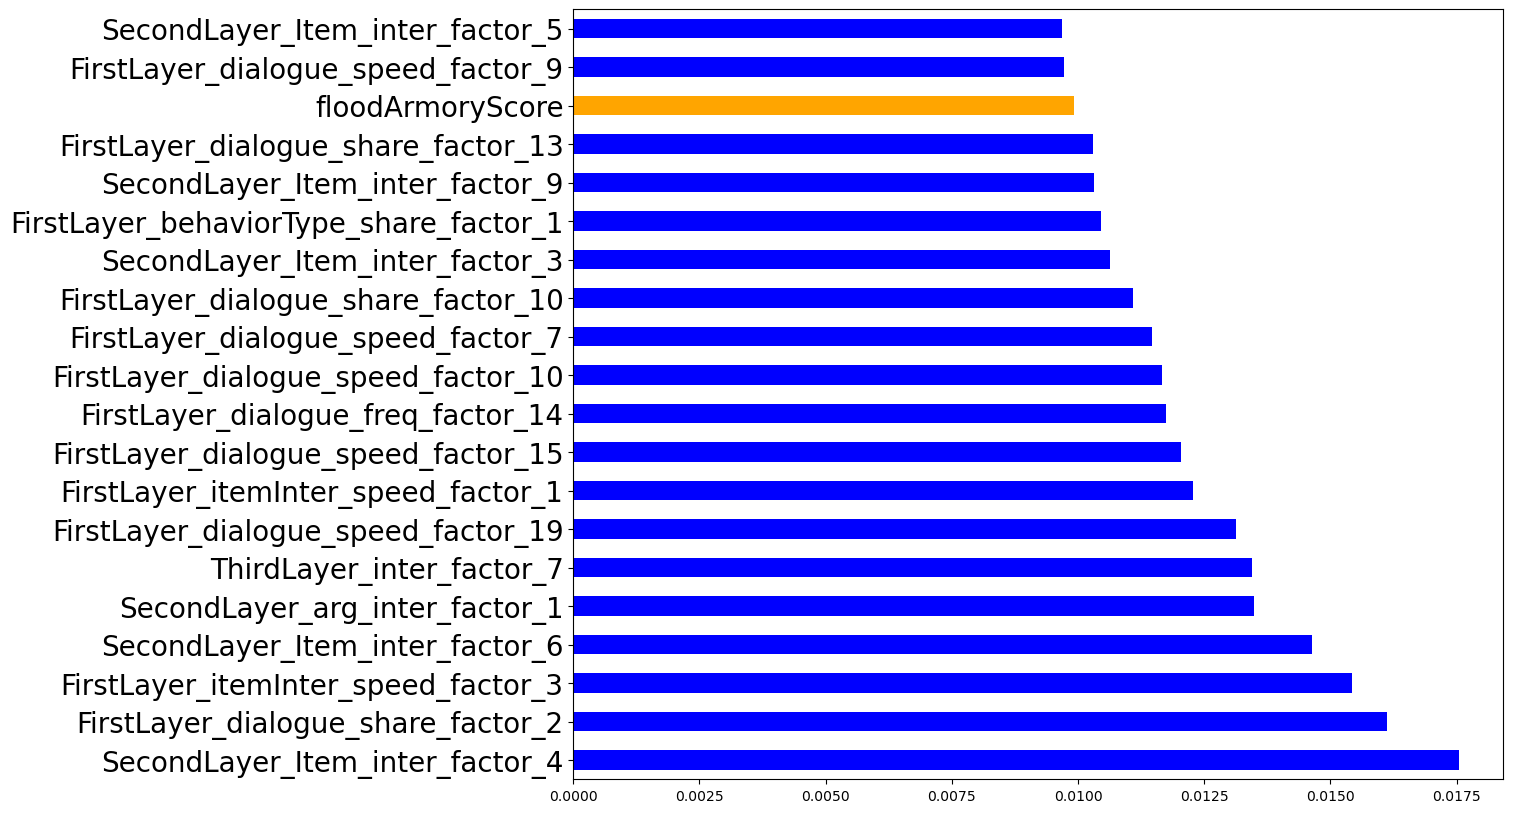

In [30]:
plt.figure(figsize=(12,10))
ax = nom_feat_importance.nlargest(20).plot(kind='barh', color = colors)
ax.tick_params(axis = "y", labelsize=20)
plt.show()